In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors

from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline

In [3]:
#Loading the dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [4]:
#Displaying first few rows of the dataset
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [5]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [6]:
#Converting all headings into lower case for consistency
df.columns=['trip_id', 'vendor_id', 'tpep_pickup_datetime','tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
'ratecode_id', 'store_and_fwd_flag', 'pu_Location_id', 'do_location_id',
'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
'tolls_amount', 'improvement_surcharge', 'total_amount']
#Displaying first few rows of the dataframe
df.head()

,trip_id,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_Location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [7]:
#Checking column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trip_id                22699 non-null  int64  
 1   vendor_id              22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   ratecode_id            22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   pu_Location_id         22699 non-null  int64  
 9   do_location_id         22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [8]:
#Converting column 'tpep_pickup_datetime ' and 'tpep_dropoff_datetime' to datetime
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

#Checking dtype for the dataframe
df.dtypes

trip_id                           int64
vendor_id                         int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
ratecode_id                       int64
store_and_fwd_flag               object
pu_Location_id                    int64
do_location_id                    int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [9]:
df.describe()

,trip_id,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,pu_Location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295


In [10]:
df.shape

(22699, 18)

In [11]:
df.size

408582

In [12]:
#Checking if df contains any null values
df.isnull().any()

trip_id                  False
vendor_id                False
tpep_pickup_datetime     False
tpep_dropoff_datetime    False
passenger_count          False
trip_distance            False
ratecode_id              False
store_and_fwd_flag       False
pu_Location_id           False
do_location_id           False
payment_type             False
fare_amount              False
extra                    False
mta_tax                  False
tip_amount               False
tolls_amount             False
improvement_surcharge    False
total_amount             False
dtype: bool

In [13]:
#Checking for duplicate data
df[df.duplicated()]

,trip_id,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_Location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount


In [14]:
#Sorting data by trip distance from maximum to minimum value
df.sort_values(by='trip_distance',ascending=False)

,trip_id,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_Location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,63574825,1,2017-07-26 22:26:58,2017-07-26 22:26:58,1,0.00,1,N,162,264,2,5.50,0.5,0.5,0.00,0.00,0.3,6.80
15916,47368116,1,2017-06-29 19:30:30,2017-06-29 19:43:29,1,0.00,1,N,79,148,3,8.50,1.0,0.5,0.00,0.00,0.3,10.30
1350,91619825,2,2017-10-30 08:20:29,2017-10-30 08:20:38,1,0.00,1,N,193,193,1,2.50,0.0,0.5,0.66,0.00,0.3,3.96
246,78660848,1,2017-09-18 20:50:53,2017-09-18 20:51:03,1,0.00,1,N,145,145,2,2.50,0.5,0.5,0.00,0.00,0.3,3.80


In [15]:
# Sorting the data by total amount and print the top 20 values
df.sort_values(by='total_amount',ascending=False).head(20)


,trip_id,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_Location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8476,11157412,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29
20312,107558404,2,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
12511,107108848,2,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74
15474,55538852,2,2017-06-06 20:55:01,2017-06-06 20:55:06,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
16379,101198443,2,2017-11-30 10:41:11,2017-11-30 11:31:45,1,25.50,5,N,132,265,2,140.00,0.0,0.5,0.00,16.26,0.3,157.06
3582,111653084,1,2017-01-01 23:53:01,2017-01-01 23:53:42,1,7.30,5,N,1,1,1,152.00,0.0,0.0,0.00,0.00,0.3,152.30
11269,51920669,1,2017-06-19 00:51:17,2017-06-19 00:52:12,2,0.00,5,N,265,265,1,120.00,0.0,0.0,20.00,11.52,0.3,151.82
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30


In [16]:
# Sort the data by total amount and print the bottom 20 values
df.sort_values(by='total_amount',ascending=False).tail(20)

,trip_id,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_Location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
14283,37675840,1,2017-05-03 19:44:28,2017-05-03 19:44:38,1,0.00,5,N,146,146,3,0.01,0.0,0.0,0.0,0.0,0.3,0.31
19067,58713019,1,2017-07-10 14:40:09,2017-07-10 14:40:59,1,0.10,5,N,261,13,3,0.00,0.0,0.0,0.0,0.0,0.3,0.30
10506,26005024,2,2017-03-30 03:14:26,2017-03-30 03:14:28,1,0.00,1,N,264,193,1,0.00,0.0,0.0,0.0,0.0,0.0,0.00
5722,49670364,2,2017-06-12 12:08:55,2017-06-12 12:08:57,1,0.00,1,N,264,193,1,0.00,0.0,0.0,0.0,0.0,0.0,0.00
4402,108016954,2,2017-12-20 16:06:53,2017-12-20 16:47:50,1,7.06,1,N,263,169,2,0.00,0.0,0.0,0.0,0.0,0.0,0.00
22566,19022898,2,2017-03-07 02:24:47,2017-03-07 02:24:50,1,0.00,1,N,264,193,1,0.00,0.0,0.0,0.0,0.0,0.0,0.00
1646,57337183,2,2017-07-05 11:02:23,2017-07-05 11:03:00,1,0.04,1,N,79,79,3,-2.50,0.0,-0.5,0.0,0.0,-0.3,-3.30
18565,43859760,2,2017-05-22 15:51:20,2017-05-22 15:52:22,1,0.10,1,N,230,163,3,-3.00,0.0,-0.5,0.0,0.0,-0.3,-3.80
314,105454287,2,2017-12-13 02:02:39,2017-12-13 02:03:08,6,0.12,1,N,161,161,3,-2.50,-0.5,-0.5,0.0,0.0,-0.3,-3.80
5758,833948,2,2017-01-03 20:15:23,2017-01-03 20:15:39,1,0.02,1,N,170,170,3,-2.50,-0.5,-0.5,0.0,0.0,-0.3,-3.80


In [17]:
# payment types represented in the data
df['payment_type'].unique()

array([1, 2, 3, 4], dtype=int64)

In [18]:
#Average tip for trips paid for with credit card(payment_type:1)
average_tip_credit_card=df[df['payment_type']==1]['tip_amount'].mean()
print('The average tip amount for trips paid for with credit card is:',average_tip_credit_card.round(2))

The average tip amount for trips paid for with credit card is: 2.73


In [19]:
#Average tip for trips paid for with cash(payment_type:2)
average_tip_cash=df[df['payment_type']==2]['tip_amount'].mean()
print('The average tip amount for trips paid for with cash is:',average_tip_cash.round(2))

The average tip amount for trips paid for with cash is: 0.0


In [20]:
#To determine how many times each vendor ID is represented in the data
print('Vendor ID unique value counts:\n',df['vendor_id'].value_counts())

Vendor ID unique value counts:
 vendor_id
2    12626
1    10073
Name: count, dtype: int64


In [21]:
#Calculating Average total amount for each vendor
average_total_amount_vendor_id=df.groupby('vendor_id')['total_amount'].mean().reset_index()
average_total_amount_vendor_id.rename(columns={'total_amount':'average_total_amount'})
average_total_amount_vendor_id

,vendor_id,total_amount
0,1,16.298119
1,2,16.320382


In [22]:
# Filtering the data for credit card payments only
credit_card_only_df=df[df['payment_type']==1]

# Calculating the average tip amount for each passenger count (credit card payments only)
average_tip_per_passenger_count_for_credit_payment=credit_card_only_df.groupby('passenger_count')['tip_amount'].mean().reset_index()
average_tip_per_passenger_count_for_credit_payment

,passenger_count,tip_amount
0,0,2.610370
1,1,2.714681
2,2,2.829949
3,3,2.726800
4,4,2.607753
5,5,2.762645
6,6,2.643326


In [23]:
numerical_columns=df.select_dtypes(include=['int64','float64']).columns
numerical_columns=[col for col in numerical_columns if not col.endswith('id')]
numerical_columns

['passenger_count',
 'trip_distance',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount']

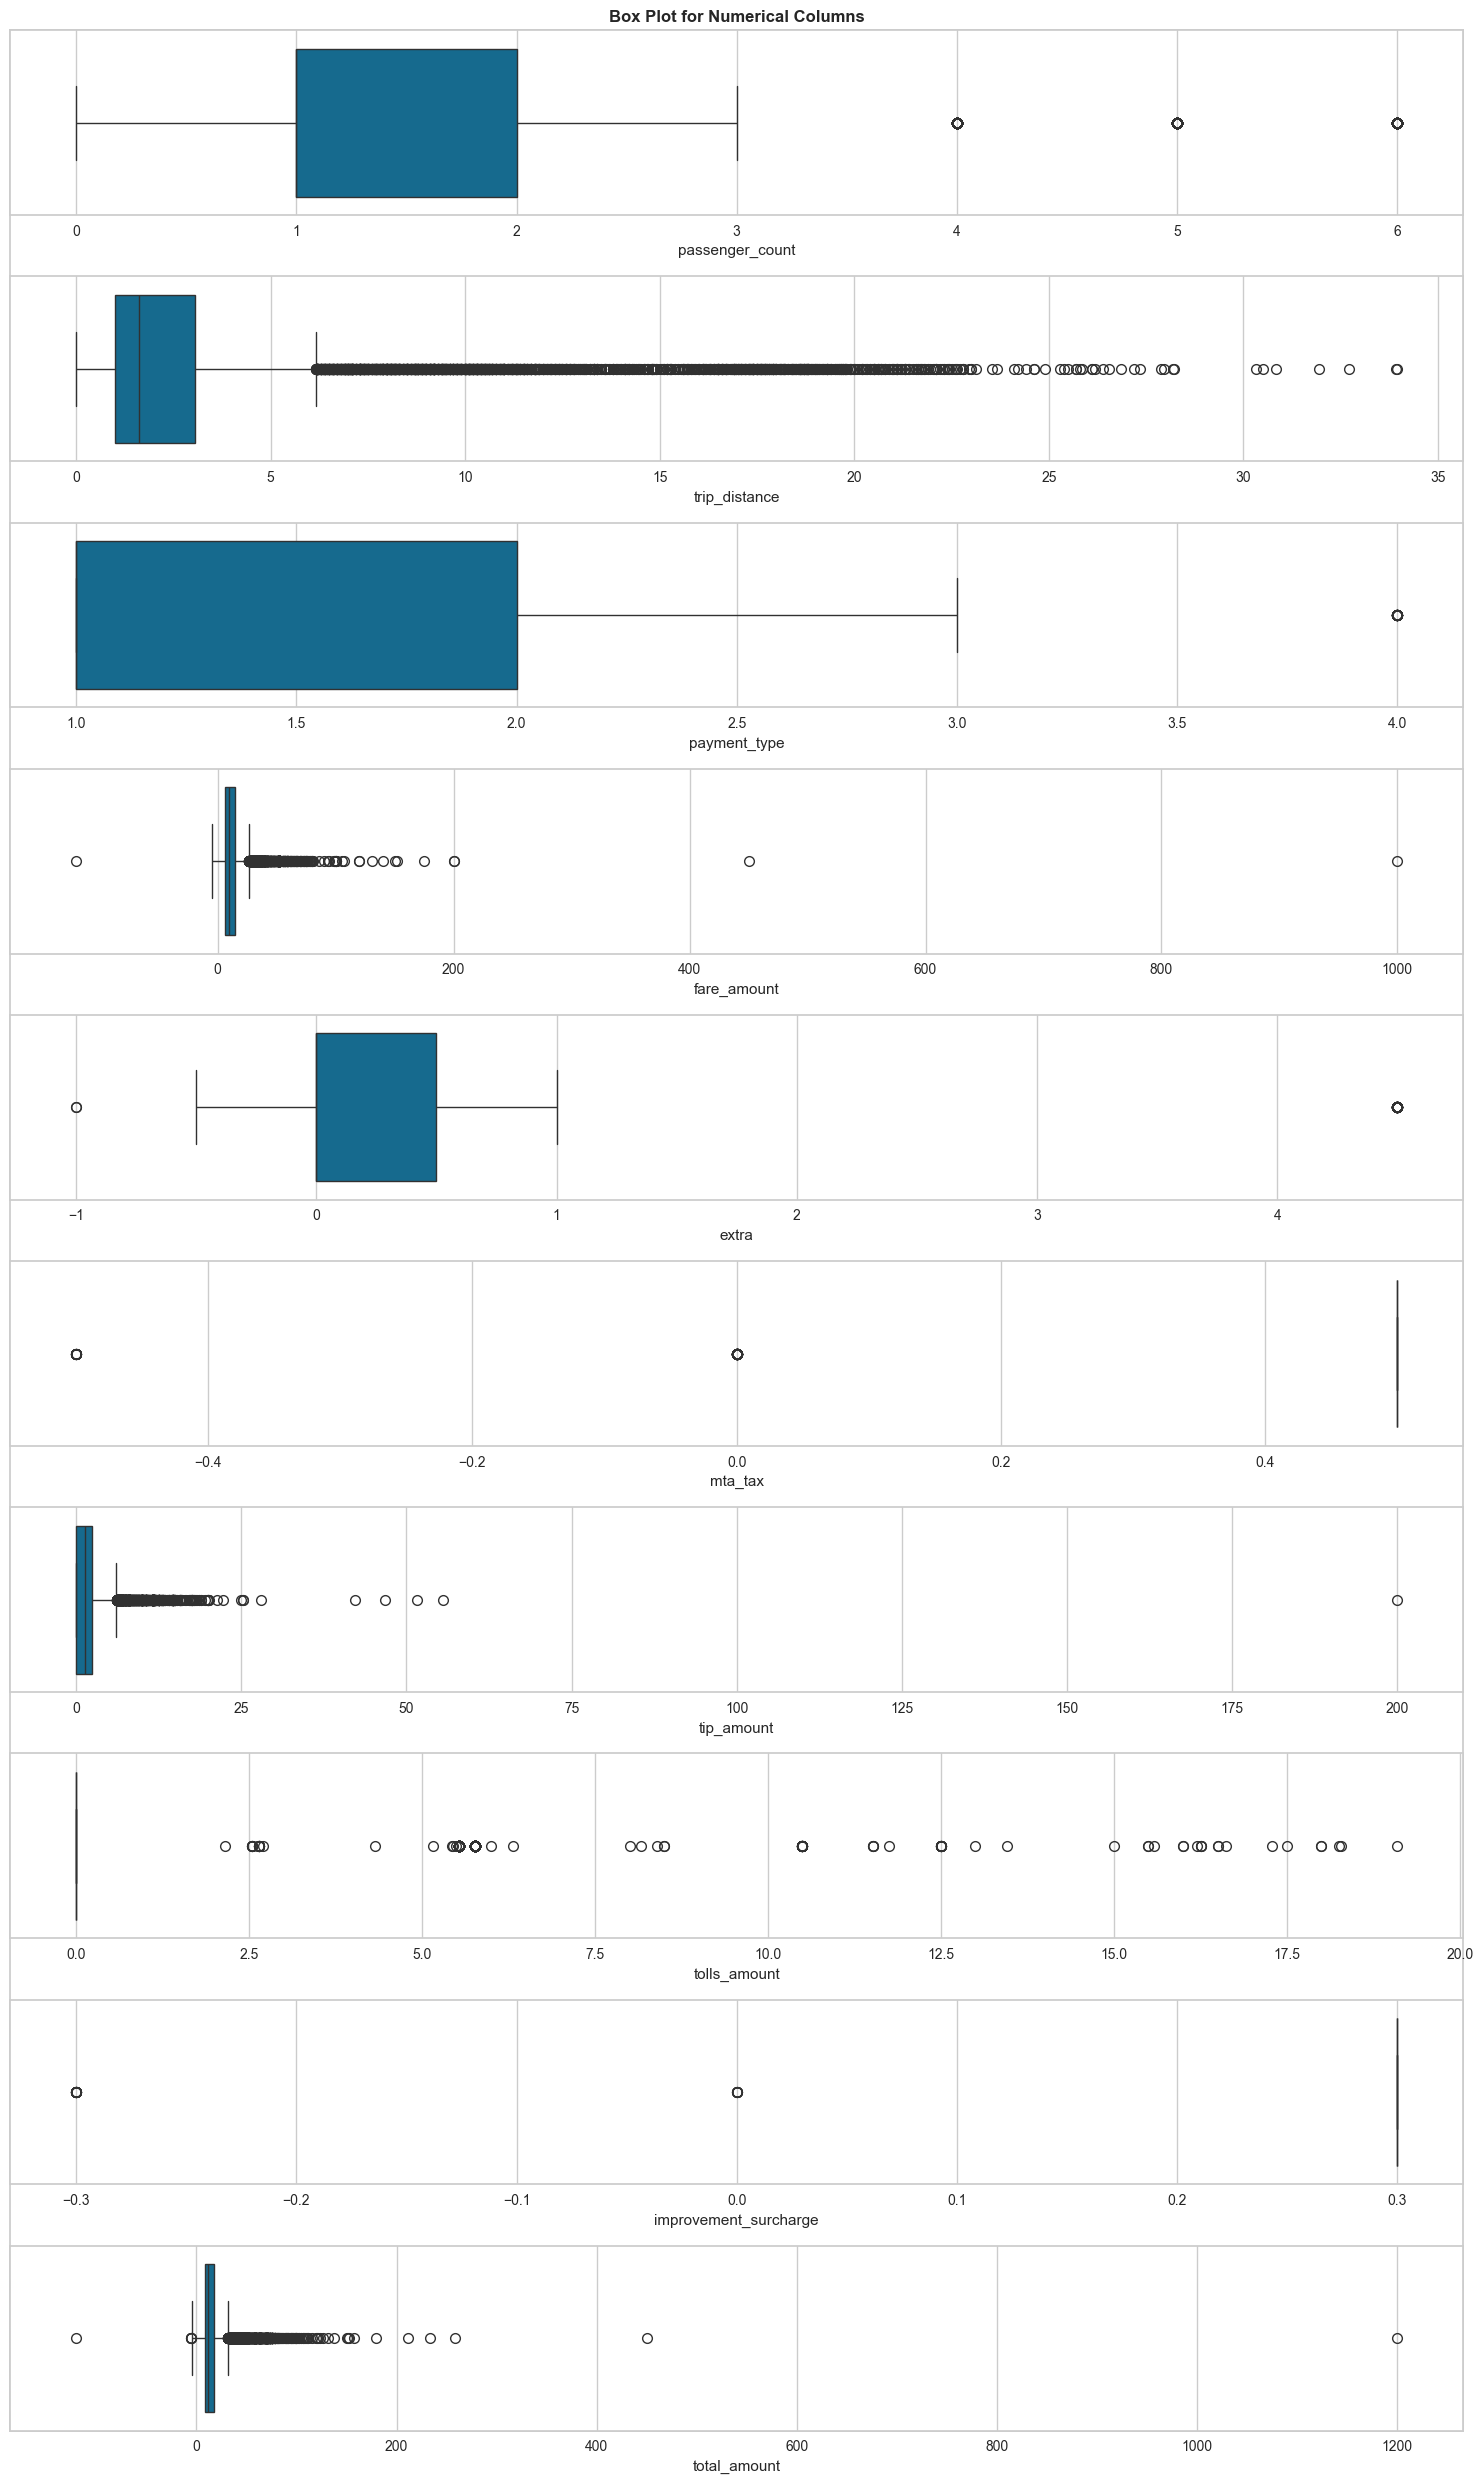

In [24]:
#Selecting numerical columns form dataframe
numerical_columns=df.select_dtypes(include=['int64','float64']).columns
#Removing columns that are id's 
numerical_columns=[col for col in numerical_columns if not col.endswith('id')]


#Creating box plot for all numerical columns
plt.figure(figsize=(15,25))
plt.title('Box Plot for Numerical Columns',fontsize=12,fontweight='bold',loc='center')
plt.xticks([])
plt.yticks([])
for i,col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns),1,i+1)
    sns.boxplot(df,x=col,vert=False)

plt.tight_layout()
plt.show()



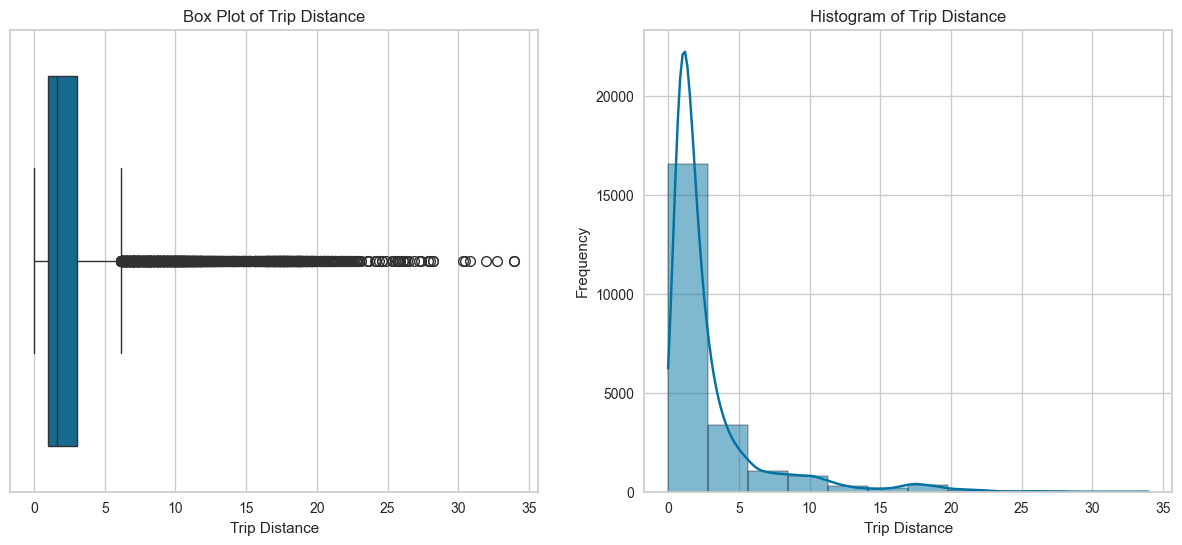

In [25]:
#Creating box plot for 'trip_distance'
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.boxplot(df,x='trip_distance',vert=False,ax=ax[0])
ax[0].set_xlabel('Trip Distance')
ax[0].set_title('Box Plot of Trip Distance')

#Creating histplot for 'trip_distance'
sns.histplot(df['trip_distance'],bins=12,kde=True,ax=ax[1])
ax[1].set_xlabel('Trip Distance')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Trip Distance')
plt.show()


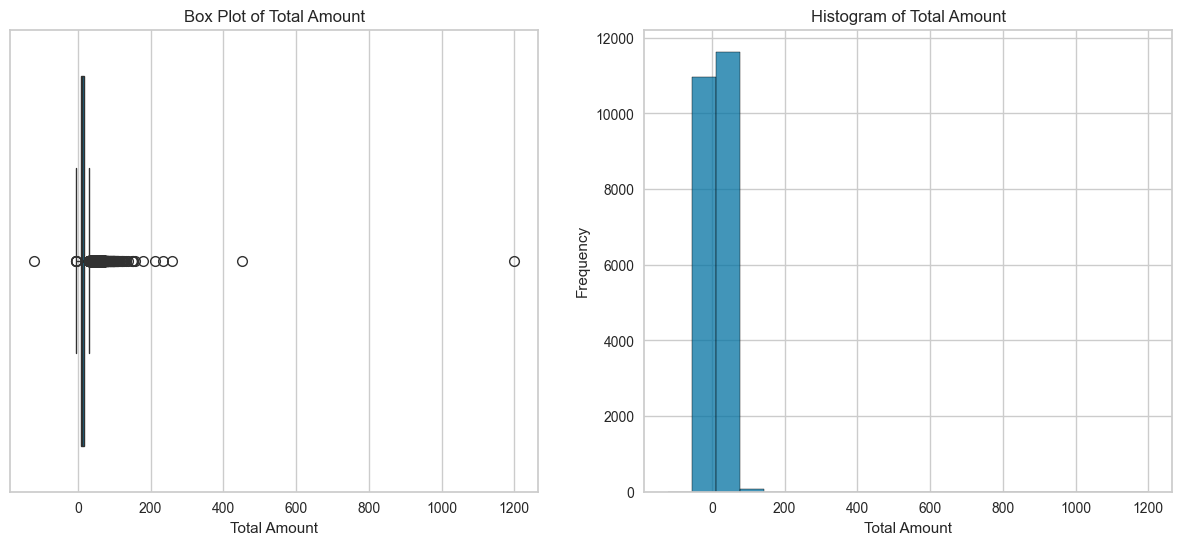

In [26]:
#Creating box plot for 'total_amount'
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.boxplot(data=df,x='total_amount',ax=ax[0])
ax[0].set_title('Box Plot of Total Amount')
ax[0].set_xlabel('Total Amount')

#Creating histplot for 'total_amount'
sns.histplot(data=df,x='total_amount',bins=20,ax=ax[1])
ax[1].set_title('Histogram of Total Amount')
ax[1].set_xlabel('Total Amount')
ax[1].set_ylabel('Frequency')

plt.show()


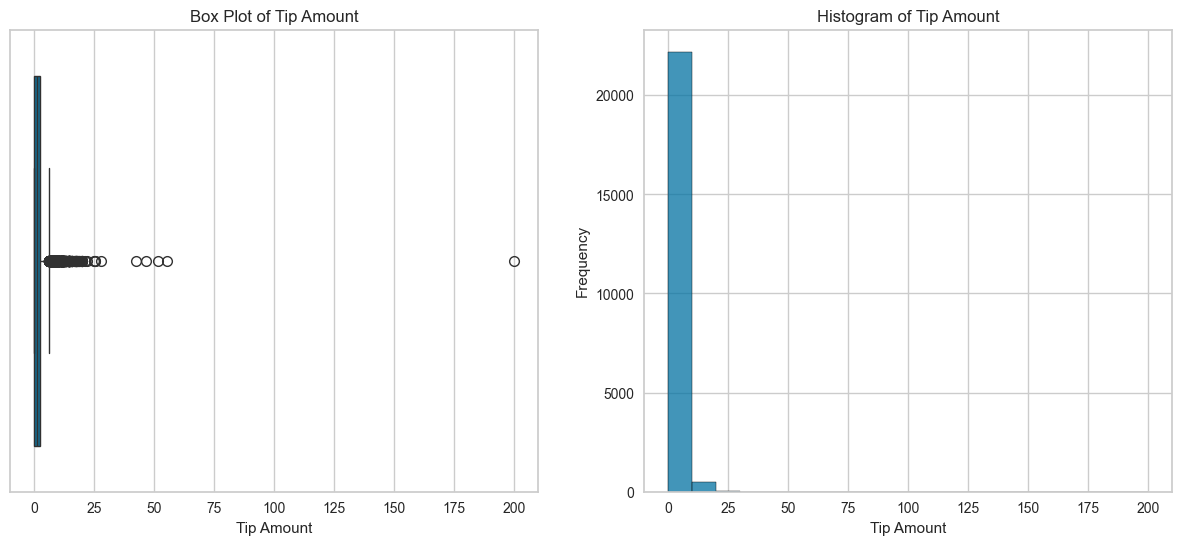

In [27]:
#Creating box plot for 'tip_amount'
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.boxplot(data=df,x='tip_amount',ax=ax[0])
ax[0].set_title('Box Plot of Tip Amount')
ax[0].set_xlabel('Tip Amount')

#Creating histplot for 'tip_amount'
sns.histplot(data=df,x='tip_amount',bins=20,ax=ax[1])
ax[1].set_title('Histogram of Tip Amount')
ax[1].set_xlabel('Tip Amount')
ax[1].set_ylabel('Frequency')

plt.show()


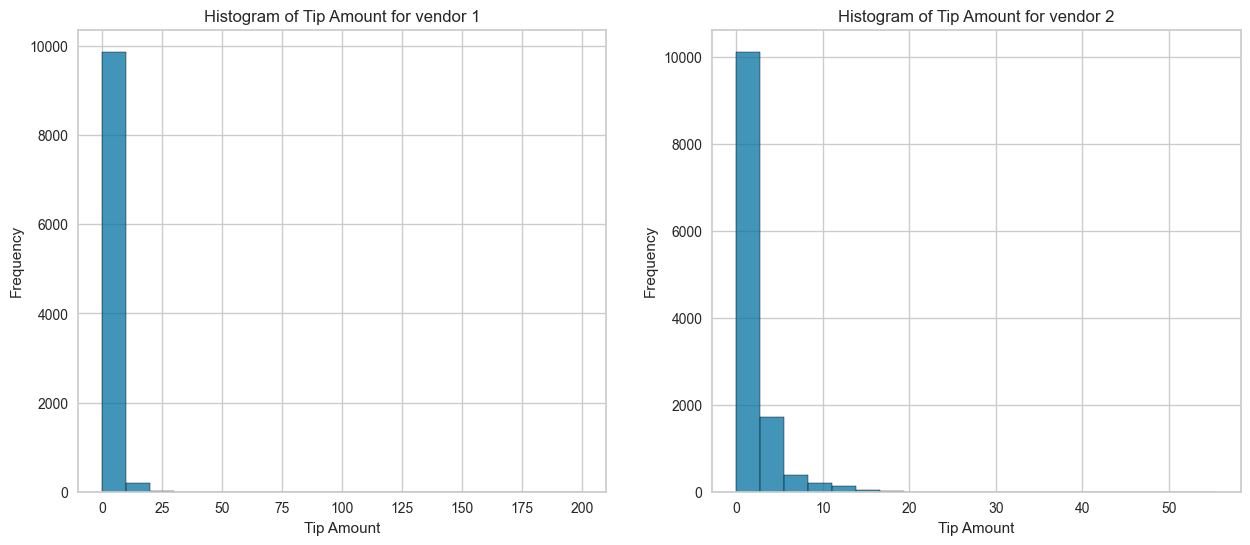

In [28]:
#Creating box plot for 'tip_amount'
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.histplot(data=df[df['vendor_id']==1],x='tip_amount',bins=20,ax=ax[0])
ax[0].set_title('Histogram of Tip Amount for vendor 1')
ax[0].set_xlabel('Tip Amount')
ax[0].set_ylabel('Frequency')

#Creating histplot for 'tip_amount'
sns.histplot(data=df[df['vendor_id']==2],x='tip_amount',bins=20,ax=ax[1])
ax[1].set_title('Histogram of Tip Amount for vendor 2')
ax[1].set_xlabel('Tip Amount')
ax[1].set_ylabel('Frequency')

plt.show()


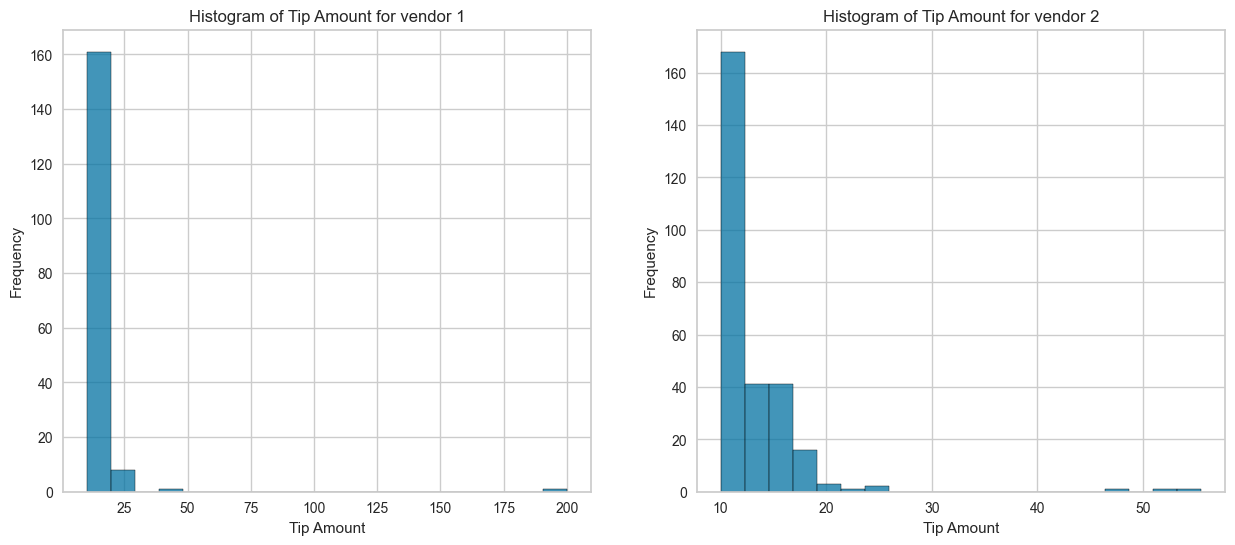

In [29]:
#Creating box plot for 'tip_amount' for vendor 1 for tip greater than $10
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.histplot(data=df[(df['vendor_id']==1) & (df['tip_amount']>10)],x='tip_amount',bins=20,ax=ax[0])
ax[0].set_title('Histogram of Tip Amount for vendor 1')
ax[0].set_xlabel('Tip Amount')
ax[0].set_ylabel('Frequency')

#Creating histplot for 'tip_amount' vendor 2 for tip greater than $10
sns.histplot(data=df[(df['vendor_id']==2) & (df['tip_amount']>10)],x='tip_amount',bins=20,ax=ax[1])
ax[1].set_title('Histogram of Tip Amount for vendor 2')
ax[1].set_xlabel('Tip Amount')
ax[1].set_ylabel('Frequency')

plt.show()


In [30]:
#Determining unique values in passenger count
passengers=np.sort(df['passenger_count'].unique())

print(f'{list(passengers)} are the number of passengers carried.')


[0, 1, 2, 3, 4, 5, 6] are the number of passengers carried.


<Figure size 1000x800 with 0 Axes>

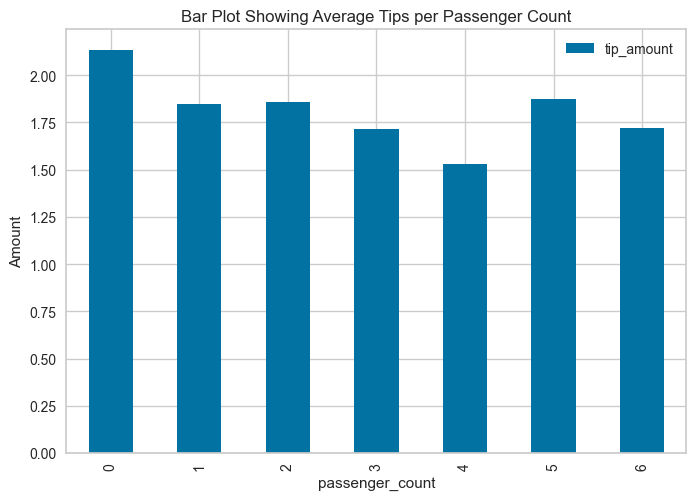

In [31]:
#Calculating mean tips by passenger count
tip_by_passenger_count =df.groupby('passenger_count')['tip_amount'].mean().reset_index()

#Bar plot showing mean tips by passenger count
plt.figure(figsize=(10,8))
tip_by_passenger_count.plot(kind='bar',x='passenger_count',y='tip_amount')
plt.title('Bar Plot Showing Average Tips per Passenger Count')
plt.ylabel('Amount')

plt.show()


In [32]:
#Creating column month using 'tpep_pickup_datetime'
df['month']=df['tpep_pickup_datetime'].dt.month

#Creating column day using 'tpep_pickup_datetime'
df['day']=df['tpep_pickup_datetime'].dt.day_name()
df.head()

,trip_id,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_Location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,3,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,4,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,12,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,5,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,4,Saturday


In [33]:
df.shape

(22699, 20)

In [34]:
df.size

453980

In [35]:
#Calculating ride count for each month
trips_month=df.groupby('month')['trip_id'].count().reset_index()
trips_month.rename(columns={'trip_id':'trip_count','month':'month_id'},inplace=True)

trips_month['month']=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
trips_month

,month_id,trip_count,month
0,1,1997,January
1,2,1769,February
2,3,2049,March
3,4,2019,April
4,5,2013,May
5,6,1964,June
6,7,1697,July
7,8,1724,August
8,9,1734,September
9,10,2027,October


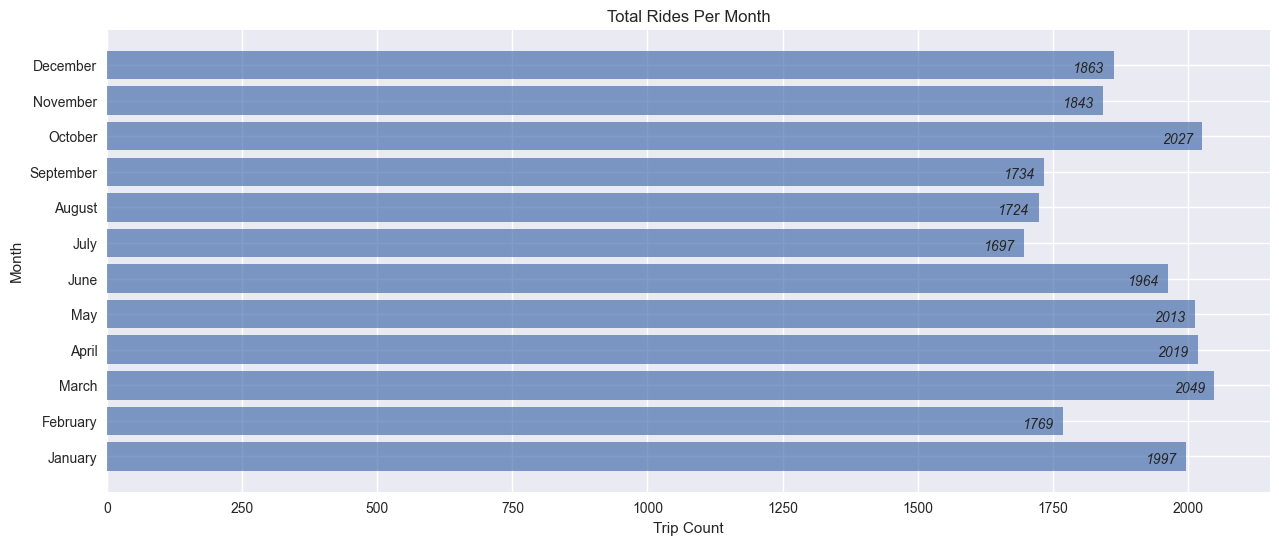

In [50]:
#Bar plot for total rides per month
plt.style.use('seaborn-v0_8')
fig,ax=plt.subplots(figsize=(15,6))
plt.barh(trips_month['month'],trips_month['trip_count'],alpha=0.7)
plt.title('Total Rides Per Month')
plt.ylabel('Month')
plt.xlabel('Trip Count')

for i,value in enumerate(trips_month['trip_count']):
    plt.text(value-75,i-0.2,value,fontstyle='italic',fontweight=500)
plt.show()

In [37]:
#Calculating ride count for each day of the month
trips_day=df.groupby('day')['trip_id'].count().reset_index()
trips_day.rename(columns={'trip_id':'trip_count'},inplace=True)

#creating a sorting order
sorting_order=(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

#Sorting day based on calender week
trips_day_sorted=trips_day.sort_values(by='day',key=lambda x: x.map({d:i for i,d in enumerate(sorting_order)}))


print(trips_day)
print('-'*30)
print(trips_day_sorted)

         day  trip_count
0     Friday        3413
1     Monday        2931
2   Saturday        3367
3     Sunday        2998
4   Thursday        3402
5    Tuesday        3198
6  Wednesday        3390
------------------------------
         day  trip_count
3     Sunday        2998
1     Monday        2931
5    Tuesday        3198
6  Wednesday        3390
4   Thursday        3402
0     Friday        3413
2   Saturday        3367


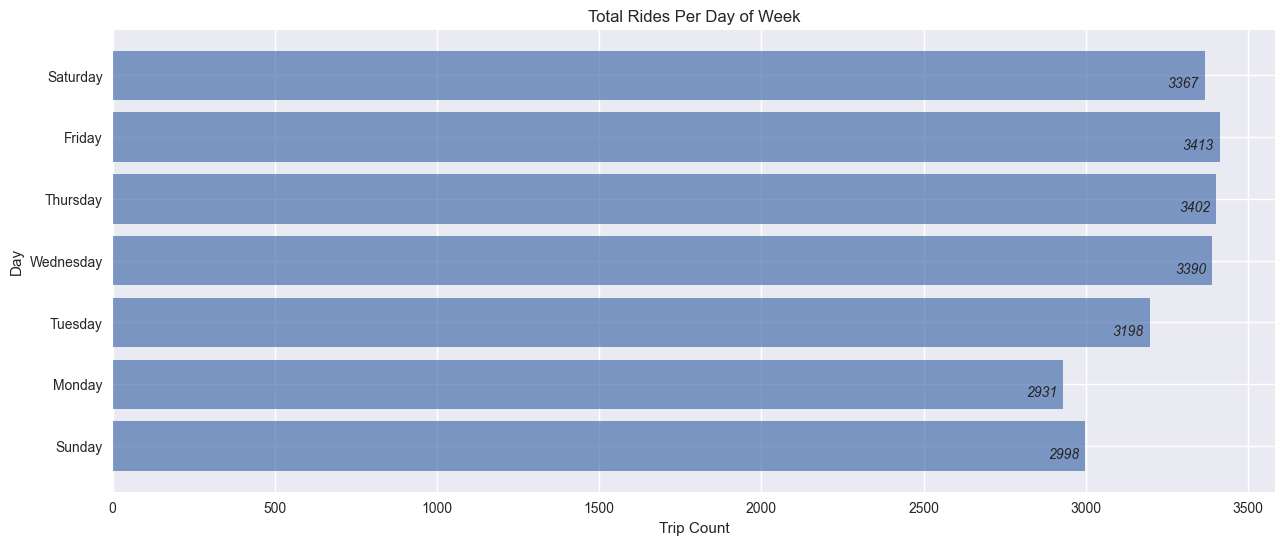

In [51]:
#Bar plot for total rides per day
fig,ax=plt.subplots(figsize=(15,6))
plt.style.use('seaborn-v0_8')
plt.barh(trips_day_sorted['day'],trips_day_sorted['trip_count'],alpha=0.7)
plt.title('Total Rides Per Day of Week')
plt.ylabel('Day')
plt.xlabel('Trip Count')

for i,value in enumerate(trips_day_sorted['trip_count']):
    plt.text(value-115,i-0.2,value,fontstyle='italic',fontweight=500)
plt.show()

In [39]:
#Calculating revenue  for each day of the month
revenue_day=df.groupby('day')['total_amount'].sum().reset_index()


#creating a sorting order
sorting_order=(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

#Sorting day based on calender week
revenue_day_sorted=revenue_day.sort_values(by='day',key=lambda x:x.map({d:i for i,d in enumerate(sorting_order)})).reset_index(drop=True)

print(revenue_day)
print('-'*30)
print(revenue_day_sorted)

         day  total_amount
0     Friday      55818.74
1     Monday      49574.37
2   Saturday      51195.40
3     Sunday      48624.06
4   Thursday      57181.91
5    Tuesday      52527.14
6  Wednesday      55310.47
------------------------------
         day  total_amount
0     Sunday      48624.06
1     Monday      49574.37
2    Tuesday      52527.14
3  Wednesday      55310.47
4   Thursday      57181.91
5     Friday      55818.74
6   Saturday      51195.40


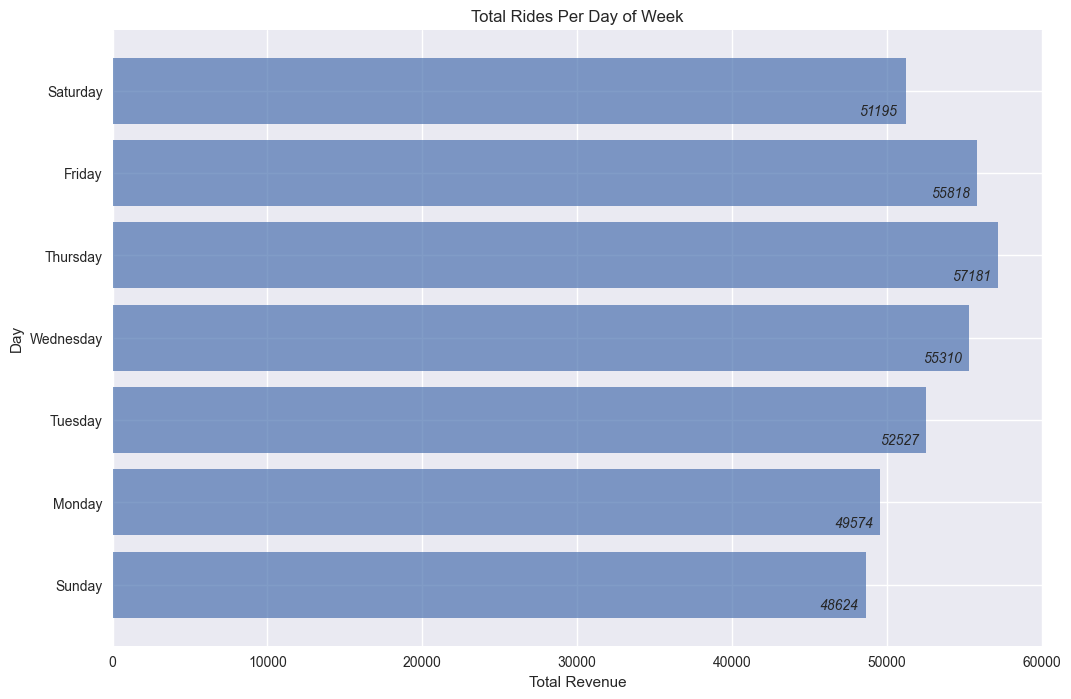

In [52]:
#Bar plot for total revenue per day
fig,ax=plt.subplots(figsize=(12,8))
plt.style.use('seaborn-v0_8')
plt.barh(revenue_day_sorted['day'],revenue_day_sorted['total_amount'],alpha=0.7)
plt.title('Total Rides Per Day of Week')
plt.ylabel('Day')
plt.xlabel('Total Revenue')

#Putting revenue labels in bars
for i,value in enumerate(revenue_day_sorted['total_amount']):
    ax.text(value-3000,i-0.3,int(value),fontweight=500,fontstyle='italic')

In [41]:
#Calculating revenue  for each month
revenue_month=df.groupby('month')['total_amount'].sum().reset_index()
revenue_month.rename(columns={'month':'month_id'},inplace=True)

revenue_month['month']=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
revenue_month

,month_id,total_amount,month
0,1,31735.25,January
1,2,28937.89,February
2,3,33085.89,March
3,4,32012.54,April
4,5,33828.58,May
5,6,32920.52,June
6,7,26617.64,July
7,8,27759.56,August
8,9,28206.38,September
9,10,33065.83,October


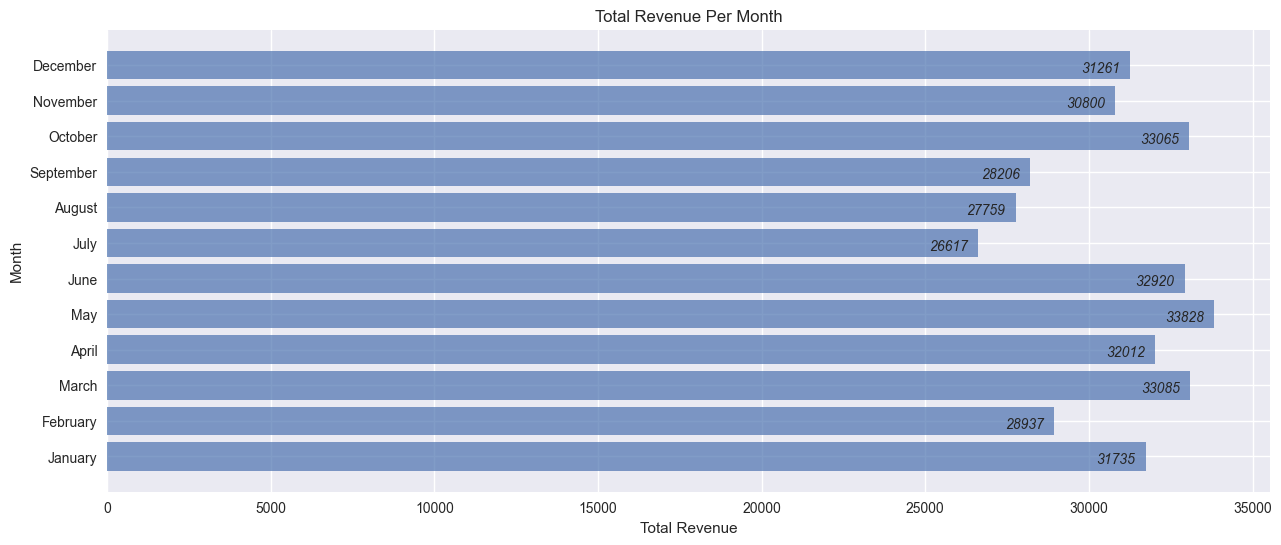

In [53]:
#Bar plot for total reveune per month
fig,ax=plt.subplots(figsize=(15,6))
plt.style.use('seaborn-v0_8')
plt.barh(revenue_month['month'],revenue_month['total_amount'],alpha=0.7)
plt.title('Total Revenue Per Month')
plt.ylabel('Month')
plt.xlabel('Total Revenue')

for i,value in enumerate(revenue_month['total_amount']):
    plt.text(value-1500,i-0.2,int(value),fontstyle='italic',fontweight=500)
plt.show()

The number of drop-off location id in the dataset is: 216
----------------------------------------------------------------------------------------------------
Average Trip Distance per Drop-off Location:
      do_location_id  average_trip_distance
0                 1              17.027353
1                 4               2.436634
2                 7               3.964944
3                 9               9.305000
4                10               3.750000
..              ...                    ...
211             261               4.935897
212             262               2.866897
213             263               2.501951
214             264               2.928783
215             265              11.039000

[216 rows x 2 columns]


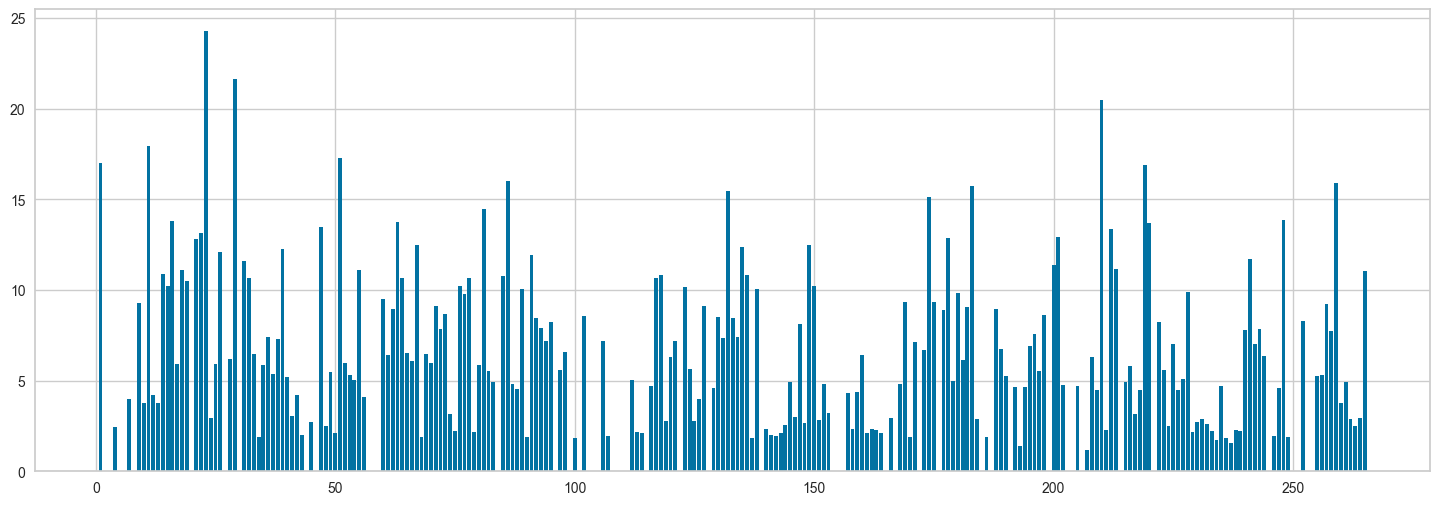

In [43]:
#Number of unique drop-off location Id
print('The number of drop-off location id in the dataset is:',df['do_location_id'].nunique())
print('-'*100)

#Mean distance for each drop off location
average_trip_distance_doloc=df.groupby('do_location_id')['trip_distance'].mean().reset_index()
average_trip_distance_doloc.rename(columns={'trip_distance':'average_trip_distance'},inplace=True)
print('Average Trip Distance per Drop-off Location:\n',average_trip_distance_doloc)

#sorting the order in descending order by mean trip distance
average_trip_distance_doloc.sort_values(by='average_trip_distance',ascending=False,inplace=True)


#ploting bar plot showing relation between trip distance and drop off location
plt.figure(figsize=(18,6))
plt.bar(average_trip_distance_doloc['do_location_id'],average_trip_distance_doloc['average_trip_distance'])
plt.show()

In [44]:
#Checking if all location id are consecutively numbered
unique_do_location=average_trip_distance_doloc['do_location_id'].sort_values(ascending=True)
consecutive_check=[unique_do_location[i]==unique_do_location[i-1]+1 for i in range(1,len(unique_do_location))]
if False in consecutive_check:
    print('All location id are not consecutive')
else:
    print('All location id are consecutive')
        
    


All location id are not consecutive


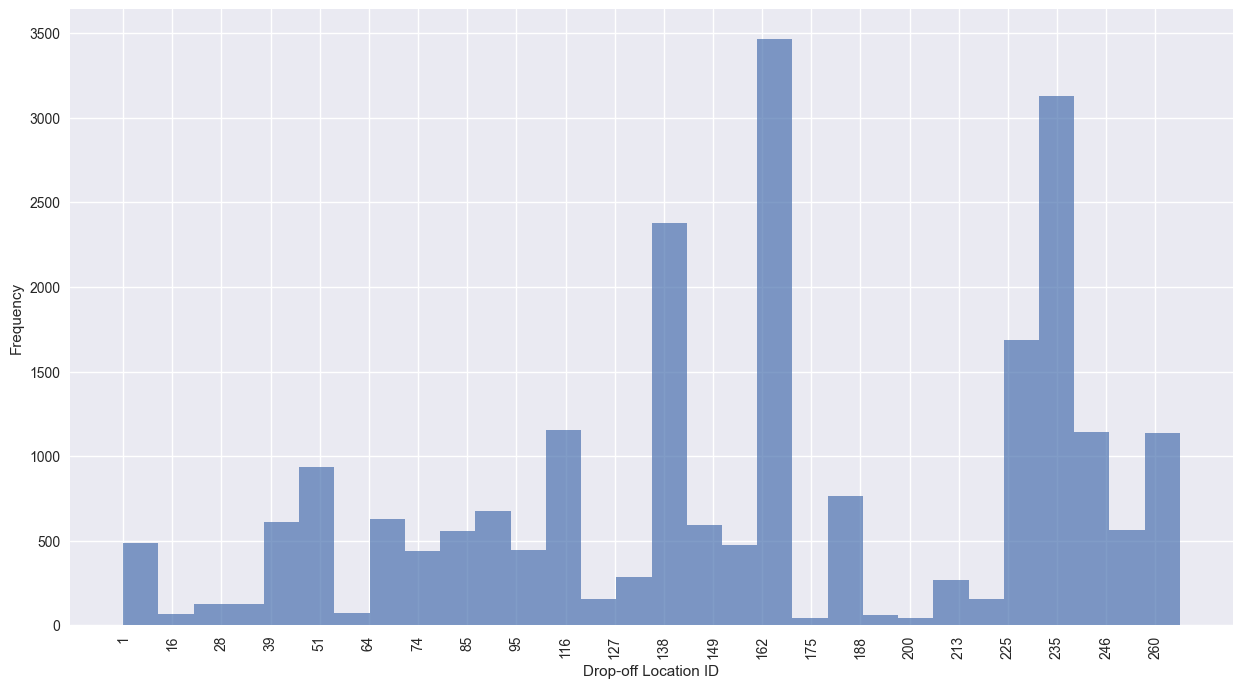

In [54]:
#Selecting 'do_location_id'
rides_dropoff=df['do_location_id'].sort_values(ascending=True)

#Converting dtype to string
rides_dropoff=rides_dropoff.astype(str)

#Ploting histogram
plt.figure(figsize=(15,8))
plt.style.use('seaborn-v0_8')
plt.hist(rides_dropoff,bins=30,alpha=0.7)
plt.xlabel('Drop-off Location ID')
plt.ylabel('Frequency')
plt.xticks(range(0,216,10),rotation=90)
plt.show()

In [57]:
#Checking descriptive stats for column 'payment_type' and 'fare_amount'
df.describe()[['payment_type','fare_amount']]

,payment_type,fare_amount
count,22699.000000,22699.000000
mean,1.336887,13.026629
min,1.000000,-120.000000
25%,1.000000,6.500000
50%,1.000000,9.500000
75%,2.000000,14.500000
max,4.000000,999.990000
std,0.496211,13.243791


In [60]:
#Calculating average fare amount for each payment type
average_fare_payment_type=df.groupby('payment_type')['fare_amount'].mean().reset_index()
average_fare_payment_type

,payment_type,fare_amount
0,1,13.429748
1,2,12.213546
2,3,12.186116
3,4,9.913043
